In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gzip as gz
import json
import pickle
import torch

# Raw Data Analysis


In [2]:
with gz.open('raw/cells.json.gz', 'rt') as f:  # 'rt' means read text
    data = json.load(f)

In [ ]:
data

In [4]:
with gz.open('raw/superblue1/superblue1.json.gz', 'rt') as f:  # 'rt' means read text
    data = json.load(f)

In [5]:
len(set([(x['xloc'], x['yloc']) for x in data['instances']]))

433

In [ ]:
set([(x['xloc'], x['yloc']) for x in data['instances']])

In [7]:
len(data['instances'])

797938

In [8]:
with gz.open('raw/superblue1/1/superblue1.json.gz', 'rt') as f:  # 'rt' means read text
    data = json.load(f)

In [ ]:
set([(x['xloc'], x['yloc']) for x in data['instances']])

# Processed Data Analysis

In [9]:
# Path to your .pkl file
file_path = "de_hnn/data/superblue/superblue_1/node_neighbor_features.pkl"

# Open and load the file
with open(file_path, 'rb') as file:  # 'rb' mode opens the file in binary read mode
    data = pickle.load(file)

# Display the data
print(data)

{'pd': array([[0.57659997, 3.78525   , 2.84100841, ..., 0.        , 0.        ,
        0.        ],
       [1.1236587 , 2.59016081, 0.48024168, ..., 0.        , 0.        ,
        0.        ],
       [1.1236587 , 2.59016081, 0.48024168, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.95083978, 0.6301005 ,
        0.03481547],
       [0.        , 0.        , 0.        , ..., 1.14630555, 1.43355668,
        0.14265637],
       [0.        , 0.        , 0.        , ..., 1.44839475, 1.73426691,
        0.1504663 ]]), 'neighbor': array([[ 3.,  5.,  7., ...,  1.,  1.,  1.],
       [ 3., 10., 20., ...,  1.,  1.,  1.],
       [ 3., 10., 20., ...,  1.,  1.,  1.],
       ...,
       [ 1.,  1.,  1., ...,  7.,  6.,  5.],
       [ 1.,  1.,  1., ...,  7.,  9.,  8.],
       [ 1.,  1.,  1., ...,  7.,  7.,  7.]])}


In [10]:
data.keys()

dict_keys(['pd', 'neighbor'])

In [11]:
data['neighbor']

array([[ 3.,  5.,  7., ...,  1.,  1.,  1.],
       [ 3., 10., 20., ...,  1.,  1.,  1.],
       [ 3., 10., 20., ...,  1.,  1.,  1.],
       ...,
       [ 1.,  1.,  1., ...,  7.,  6.,  5.],
       [ 1.,  1.,  1., ...,  7.,  9.,  8.],
       [ 1.,  1.,  1., ...,  7.,  7.,  7.]])

In [12]:
file_path = "de_hnn/data/superblue/superblue_1/pyg_data.pkl"

# Open and load the file
with open(file_path, 'rb') as file:  # 'rb' mode opens the file in binary read mode
    data = torch.load(file)

# Display the data
print(data)

/var/folders/75/4b4y2mlx2yv_34rkxb83ydkr0000gn/T/ipykernel_27856/2892397952.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(file)


Data(node_features=[797938, 45], net_features=[821537, 11], edge_index_sink_to_net=[2, 2139111], edge_index_source_to_net=[2, 810936], node_demand=[797938], net_demand=[821537], net_hpwl=[821537], batch=[797938], num_vn=99, pos_lst=[797938, 2])


In [13]:
data.keys()

['net_hpwl',
 'batch',
 'pos_lst',
 'edge_index_sink_to_net',
 'net_demand',
 'node_demand',
 'net_features',
 'edge_index_source_to_net',
 'node_features',
 'num_vn']

In [14]:
len(data['node_features'])

797938

In [15]:
# pos_lst has phyiscal location of every cell instance
data['pos_lst'].shape

torch.Size([797938, 2])

In [16]:
np.mean([x[0] for x in data['pos_lst']])

0.57940125

In [17]:
x, y = zip(*data['pos_lst'])

In [18]:
len(x)

797938

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


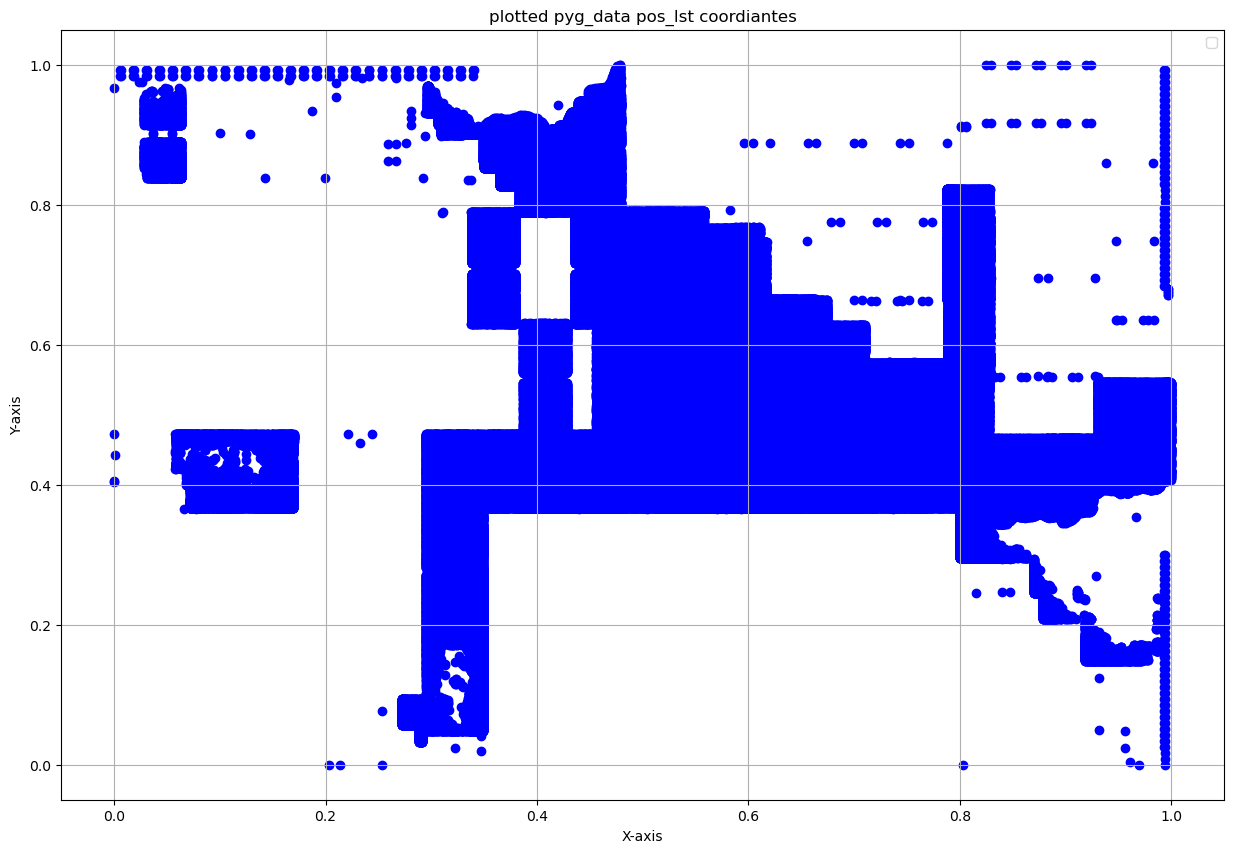

In [19]:
plt.figure(figsize=(15, 10))
plt.scatter(x, y, color='blue')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Show the grid
plt.grid(True)

# Display the plot
plt.title('plotted pyg_data pos_lst coordiantes')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


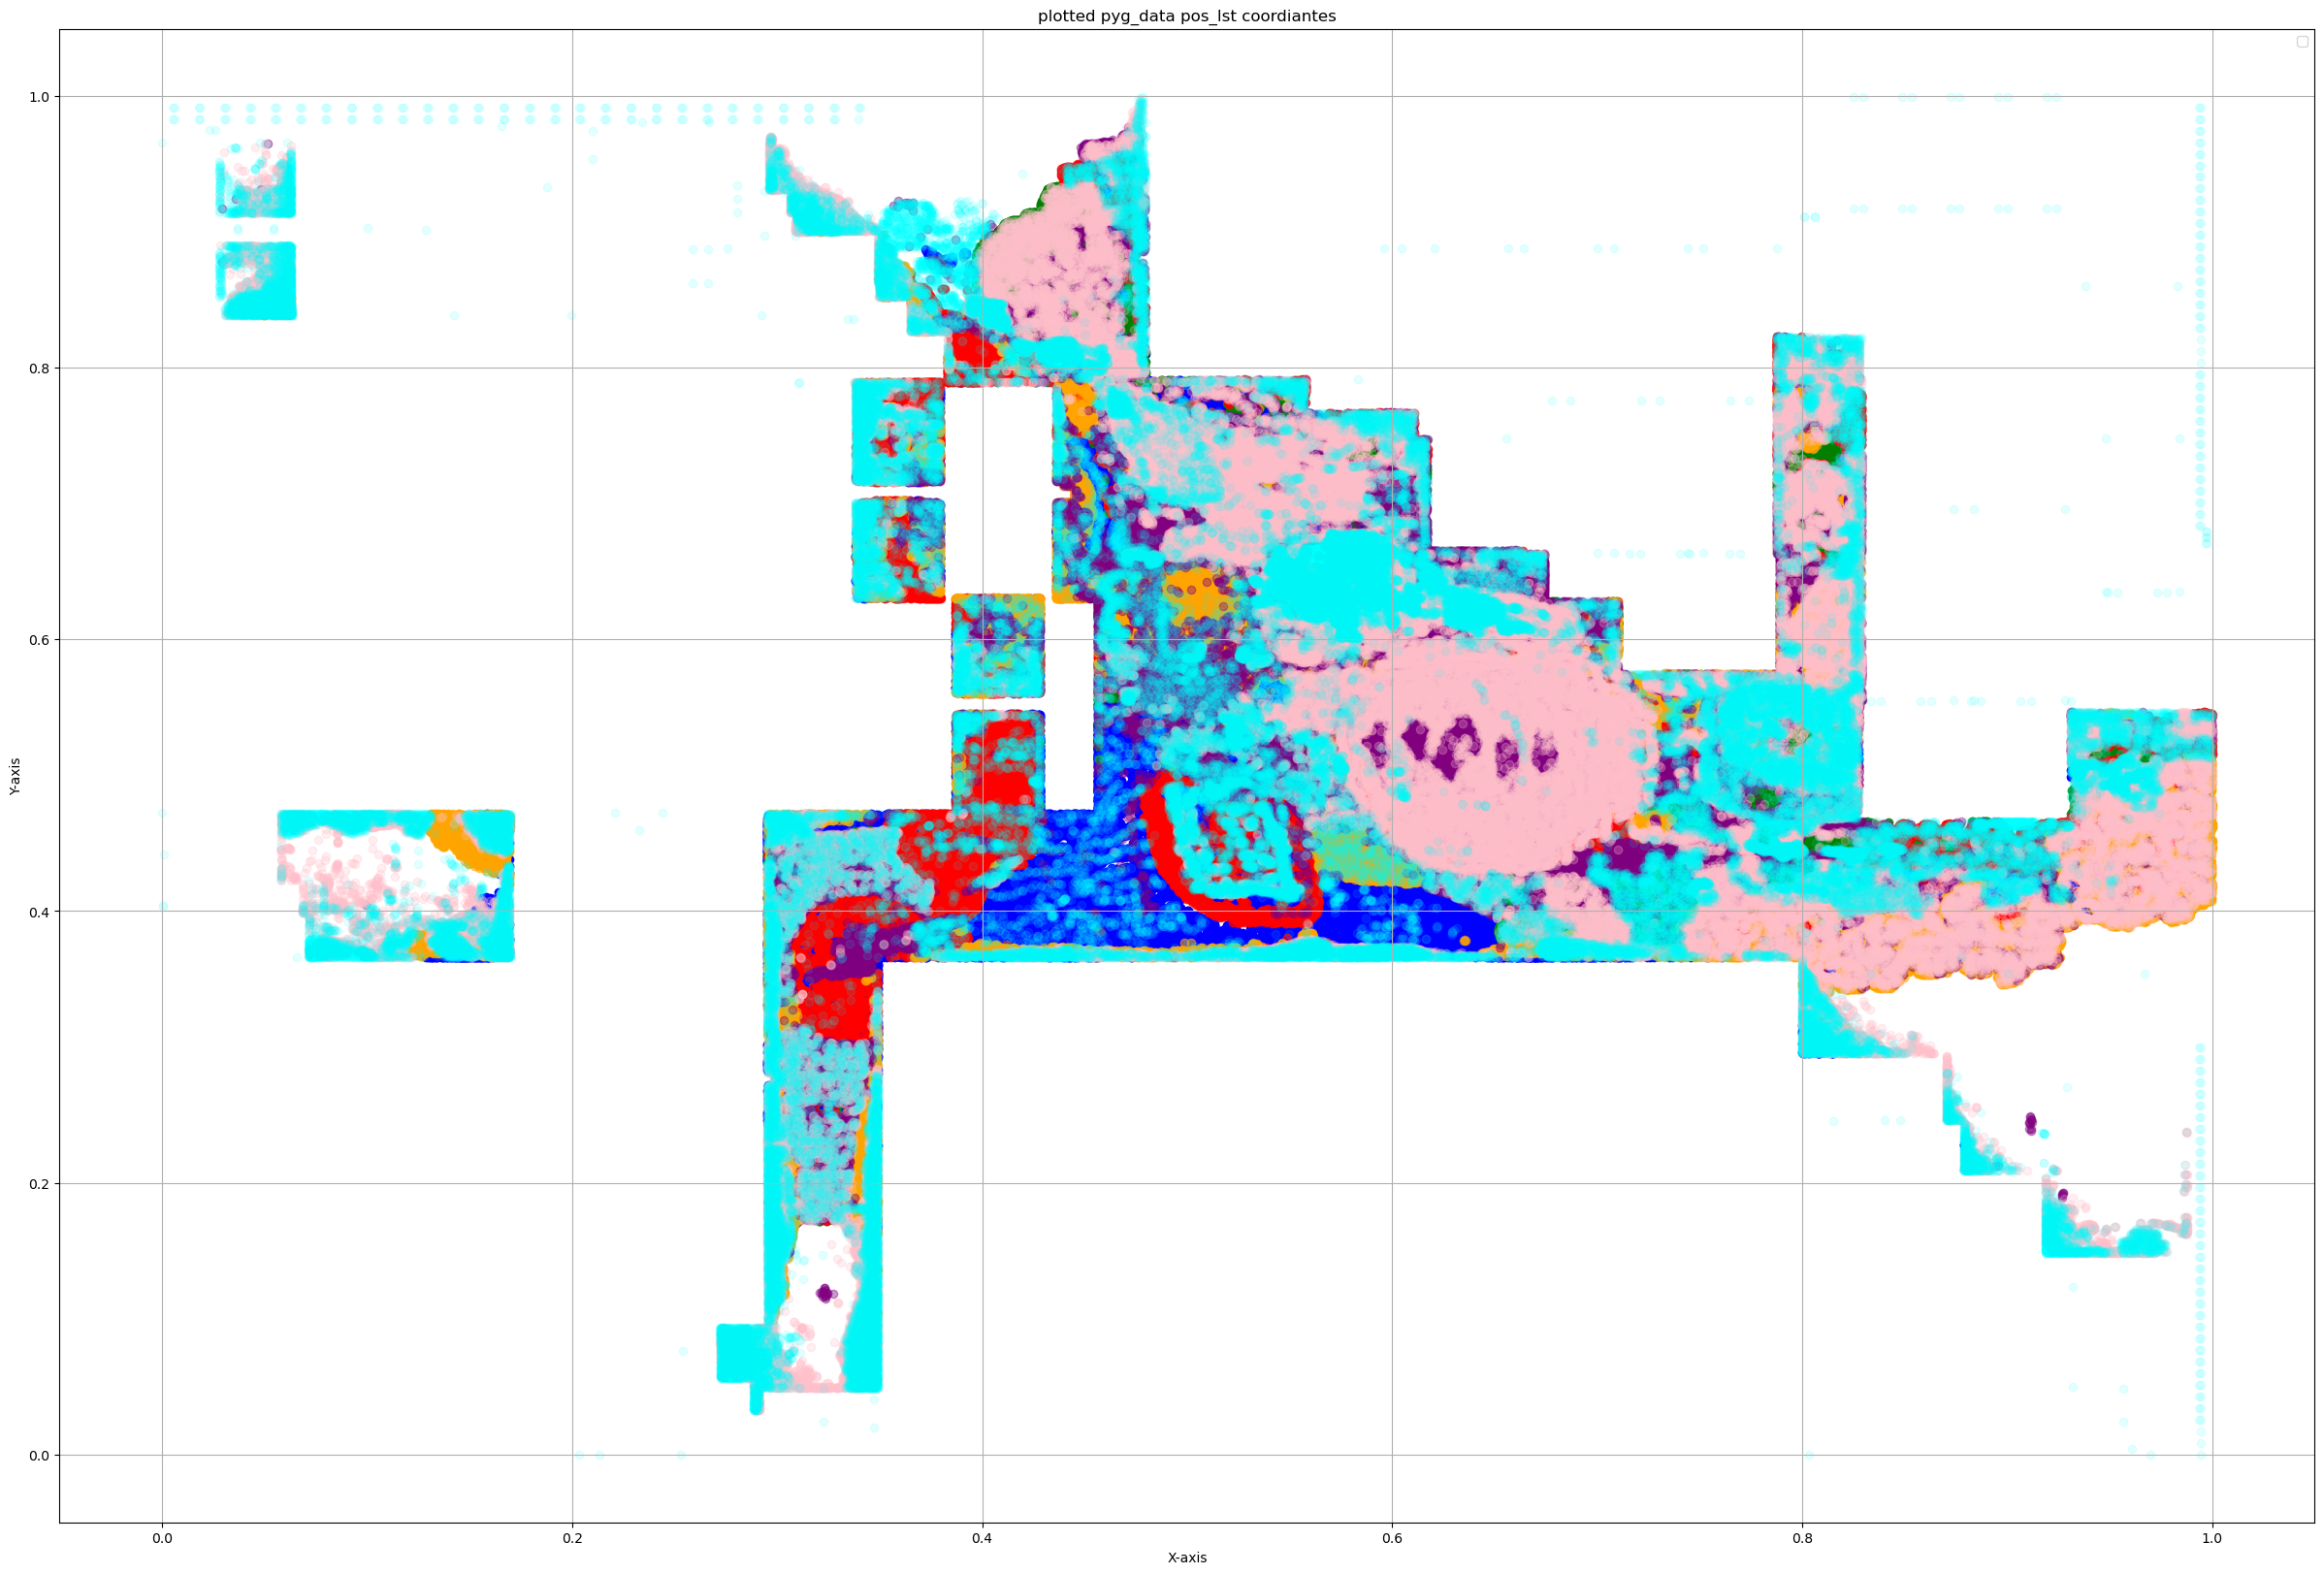

In [20]:
plt.figure(figsize=(30, 20))
plt.scatter(x[:100000], y[:100000], color='blue', alpha=1)  # Scatter plot for individual points
plt.scatter(x[100000:200000], y[100000:200000], color='green', alpha=0.85)  # Scatter plot for individual points
plt.scatter(x[200000:300000], y[200000:300000], color='red', alpha=0.7)  # Scatter plot for individual points
plt.scatter(x[300000:400000], y[300000:400000], color='orange', alpha=0.55)  # Scatter plot for individual points
plt.scatter(x[400000:500000], y[400000:500000], color='purple', alpha=0.4)  # Scatter plot for individual points
plt.scatter(x[600000:700000], y[600000:700000], color='pink', alpha=0.25)  # Scatter plot for individual points
plt.scatter(x[700000:], y[700000:], color='cyan', alpha=0.1)  # Scatter plot for individual points


# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Show the grid
plt.grid(True)

# Display the plot
plt.title('plotted pyg_data pos_lst coordiantes')
plt.show()

In [21]:
print(len(data['pos_lst']))
print(len(set([(x[0], x[1]) for x in data['pos_lst']])))

797938
797938


In [22]:
a = [(1.1, 1.1), (1.1, 1.1)]

In [23]:
set(a)

{(1.1, 1.1)}

In [24]:
data.keys()

['net_hpwl',
 'batch',
 'pos_lst',
 'edge_index_sink_to_net',
 'net_demand',
 'node_demand',
 'net_features',
 'edge_index_source_to_net',
 'node_features',
 'num_vn']

In [25]:
len(data['edge_index_source_to_net'][1])

810936

In [26]:
len(data['edge_index_sink_to_net'][0])

2139111

In [27]:
# source/dest cell id (first tensor) --> net id (second tensor)
data['edge_index_source_to_net']

tensor([[ 658922,  774971,  774865,  ...,  251265,  655325,  655325],
        [ 797943,  797944,  797945,  ..., 1619472, 1619473, 1619474]])

In [28]:
# sink/origin cell id (first tensor) --> net id (second tensor)
data['edge_index_sink_to_net']

tensor([[ 478481,  478482,  478483,  ...,  572072,  727951,  636673],
        [ 797938,  797938,  797938,  ..., 1619472, 1619473, 1619474]])

In [29]:
# net IDs start from 797938
torch.max(data['edge_index_sink_to_net'][1]) - torch.min(data['edge_index_sink_to_net'][1])

tensor(821536)

In [30]:
data['net_features'].shape

torch.Size([821537, 11])

In [31]:
data['node_features'].shape

torch.Size([797938, 45])

In [32]:
# Num of unique nets connected to source cells, num of unique nets connected to sink cells
print(len(torch.unique(data['edge_index_source_to_net'][1])))
print(len(torch.unique(data['edge_index_sink_to_net'][1])))

810936
813905


In [33]:
# Number of unique nets used in superblue1
torch.unique(torch.cat([torch.unique(data['edge_index_source_to_net'][1]), torch.unique(data['edge_index_sink_to_net'][1])])).shape

torch.Size([820680])

# Random Walk Algo


In [34]:
source_to_net = data['edge_index_source_to_net']
sink_to_net = data['edge_index_sink_to_net']

1. specify source cell to start at
2. take net id it is connected to from source_to_net
3. from sink_to_net, get all sinks attached to net id
4. take one cell at random
5. repeat steps 1-4 (can choose to not repeat visited cells)

In [35]:
source_to_net

tensor([[ 658922,  774971,  774865,  ...,  251265,  655325,  655325],
        [ 797943,  797944,  797945,  ..., 1619472, 1619473, 1619474]])

In [36]:
sink_to_net

tensor([[ 478481,  478482,  478483,  ...,  572072,  727951,  636673],
        [ 797938,  797938,  797938,  ..., 1619472, 1619473, 1619474]])

In [37]:
start_cell = source_to_net[0][torch.randint(0, len(source_to_net[0]), (1,))].item()
start_net = source_to_net[1][source_to_net[0] == start_cell]
start_net
def random_walk_no_revisit(start_node, source_to_net, sink_to_net, max_steps=100):
    """
    Performs random walk starting from given node, without revisiting nodes
    
    Args:
        start_node: Starting node ID
        source_to_net: Edge index tensor connecting source nodes to nets
        sink_to_net: Edge index tensor connecting sink nodes to nets 
        max_steps: Maximum number of steps to take
        
    Returns:
        path: List of visited node IDs in order
    """
    
    visited = set([start_node])
    path = [start_node]
    current_node = start_node
    
    for _ in range(max_steps):
        # Get nets connected to current node
        connected_nets = source_to_net[1][source_to_net[0] == current_node]
        
        if len(connected_nets) == 0:
            break
            
        # Randomly select one of the connected nets
        selected_net = connected_nets[torch.randint(0, len(connected_nets), (1,))]
        
        # Get all sink nodes connected to selected net
        possible_next_nodes = sink_to_net[0][sink_to_net[1] == selected_net]
        
        # Filter out already visited nodes
        unvisited_nodes = [n.item() for n in possible_next_nodes if n.item() not in visited]
        
        if not unvisited_nodes:
            break
            
        # Randomly select next unvisited node
        next_node = unvisited_nodes[torch.randint(0, len(unvisited_nodes), (1,)).item()]
        
        visited.add(next_node)
        path.append(next_node)
        current_node = next_node
    # Calculate distances from start position
    start_pos = data['pos_lst'][start_node]
    distances = []
    for node in path:
        pos = data['pos_lst'][node]
        dist = torch.sqrt(((pos[0] - start_pos[0])**2 + (pos[1] - start_pos[1])**2).float())
        distances.append((node, round(dist.item(), 7)))
    return distances

valid_pairs = []
# Example usage
for _ in range(10):
    start_cell = source_to_net[0][torch.randint(0, len(source_to_net[0]), (1,))].item()
    start_net = source_to_net[1][source_to_net[0] == start_cell]
    path = random_walk_no_revisit(start_cell, source_to_net, sink_to_net)
    for i in range(5, len(path)):
        if path[i][1] < 0.01:
            valid_pairs.append((path[0][0], path[i][0]))
    print(f"Random walk path starting from node {start_cell}:")
    print(path)
print()
print("Valid Pairs:")
print(valid_pairs)

Random walk path starting from node 320435:
[(320435, 0.0), (265591, 0.0131725), (504099, 0.0154096), (316279, 0.0251672), (348915, 0.021212), (270915, 0.021248), (270893, 0.0208987), (504076, 0.0216796), (259884, 0.0081097), (259895, 0.01292), (259906, 0.0145338), (259917, 0.0145366), (504100, 0.0150477), (243261, 0.0441436), (243150, 0.0435999), (39647, 0.0282663), (39869, 0.0259461), (493877, 0.0276422), (39536, 0.027822)]
Random walk path starting from node 768474:
[(768474, 0.0), (650526, 0.0013226), (650525, 0.0030203), (650702, 0.013159), (768378, 0.0447379), (768180, 0.1727547), (732458, 0.1600638), (768436, 0.2730614), (768190, 0.2975056)]
Random walk path starting from node 420084:
[(420084, 0.0), (420083, 0.0008261), (609751, 0.0036407), (464908, 0.060264), (619231, 0.060287), (390950, 0.0376316), (389520, 0.0226476), (388273, 0.021885), (388271, 0.0226351), (601013, 0.0226511), (391466, 0.1212844), (391468, 0.1206043), (421985, 0.049951), (421987, 0.041169), (421301, 0.0094

In [63]:
design_list = [1, 2, 3, 5, 6, 7, 9, 11, 14, 16]
valid_pairs_all = []
for design in design_list:
    file_path = f"de_hnn/data/superblue/superblue_{design}/pyg_data.pkl"
    with open(file_path, 'rb') as file:  # 'rb' mode opens the file in binary read mode
        data = torch.load(file)
    source_to_net = data['edge_index_source_to_net']
    sink_to_net = data['edge_index_sink_to_net']
    for _ in range(100):
        start_cell = source_to_net[0][torch.randint(0, len(source_to_net[0]), (1,))].item()
        start_net = source_to_net[1][source_to_net[0] == start_cell]
        path = random_walk_no_revisit(start_cell, source_to_net, sink_to_net)
        for i in range(5, len(path)):
            if path[i][1] < 0.01:
                valid_pairs_all.append(((path[0][0], path[i][0]), design))
print("Valid Pairs:")
print(valid_pairs_all)


/var/folders/75/4b4y2mlx2yv_34rkxb83ydkr0000gn/T/ipykernel_27856/3729213115.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(file)


KeyboardInterrupt: 

# Part 2: Data Analysis of Valid Pairs

In [ ]:
# from tqdm import tqdm

# design_list = [1, 2, 3, 5, 6, 7, 9, 11, 14, 16]
# valid_pairs_all = []

# # Outer progress bar for designs
# for design in tqdm(design_list, desc="Processing designs", position=0):
#     print(f"\nProcessing design {design}")  # Print current design number
#     file_path = f"de_hnn/data/superblue/superblue_{design}/pyg_data.pkl"
#     with open(file_path, 'rb') as file:
#         data = torch.load(file)
#     source_to_net = data['edge_index_source_to_net']
#     sink_to_net = data['edge_index_sink_to_net']
    
#     # Inner progress bar for random walks within each design
#     for _ in tqdm(range(25), desc=f"Random walks for design {design}", 
#                  position=1, leave=True):  # Changed leave to True
#         start_cell = source_to_net[0][torch.randint(0, len(source_to_net[0]), (1,))].item()
#         start_net = source_to_net[1][source_to_net[0] == start_cell]
#         path = random_walk_no_revisit(start_cell, source_to_net, sink_to_net)
#         for i in range(5, len(path)):
#             if path[i][1] < 0.01:
#                 valid_pairs_all.append(((path[0][0], path[i][0]), design))
    
#     print()  # Add blank line between designs

# print("\nValid Pairs:")
# print(valid_pairs_all)

valid_pairs_all finds valid pairs of cells that are topologically far and physically close from every design of superblue available, the number after the tuple pair is the design number

right now, looking at 1000 random sources per design

In [83]:
design_list = [1, 2, 3, 5, 6, 7, 9, 11, 14, 16]
valid_pairs_all = []

# Outer progress bar for designs
for design in design_list:
    print(f"\nProcessing design {design}", flush=True)  # Added flush=True
    file_path = f"de_hnn/data/superblue/superblue_{design}/pyg_data.pkl"
    with open(file_path, 'rb') as file:
        data = torch.load(file)
    source_to_net = data['edge_index_source_to_net']
    sink_to_net = data['edge_index_sink_to_net']
    
    for i in range(100):  
        if i % 10 == 0:
            print(f"Processing design {design}, {i} walks completed")
        start_cell = source_to_net[0][torch.randint(0, len(source_to_net[0]), (1,))].item()
        start_net = source_to_net[1][source_to_net[0] == start_cell]
        path = random_walk_no_revisit(start_cell, source_to_net, sink_to_net)
        for i in range(5, len(path)):
            if path[i][1] < 0.01:
                valid_pairs_all.append(((path[0][0], path[i][0]), design))

print("\nValid Pairs:")
print(valid_pairs_all)


Processing design 1
Processing design 1, 0 walks completed


/var/folders/75/4b4y2mlx2yv_34rkxb83ydkr0000gn/T/ipykernel_27856/1442282098.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(file)


Processing design 1, 10 walks completed
Processing design 1, 20 walks completed
Processing design 1, 30 walks completed
Processing design 1, 40 walks completed
Processing design 1, 50 walks completed
Processing design 1, 60 walks completed
Processing design 1, 70 walks completed
Processing design 1, 80 walks completed
Processing design 1, 90 walks completed

Processing design 2
Processing design 2, 0 walks completed
Processing design 2, 10 walks completed
Processing design 2, 20 walks completed
Processing design 2, 30 walks completed
Processing design 2, 40 walks completed
Processing design 2, 50 walks completed
Processing design 2, 60 walks completed
Processing design 2, 70 walks completed
Processing design 2, 80 walks completed
Processing design 2, 90 walks completed

Processing design 3
Processing design 3, 0 walks completed
Processing design 3, 10 walks completed
Processing design 3, 20 walks completed
Processing design 3, 30 walks completed
Processing design 3, 40 walks completed


In [84]:
len(valid_pairs_all)

1614

In [85]:
len(design_list)

10

## Part 1

Taking results of purely random walks and adding dummy connections between the pairs

Note: most likely adding a dummy net between the two

In [38]:
241659 in source_to_net[0], 718013 in sink_to_net[0]

(True, True)

In [39]:
# finding where the indices of a certain cell pair is and checking whether there is an existing connection between them
torch.where(source_to_net[0] == 241659)
torch.where(sink_to_net[0] == 718013)
source_to_net[1][torch.where(source_to_net[0] == 241659)] == source_to_net[1][torch.where(sink_to_net[0] == 718013)]


IndexError: index 2139097 is out of bounds for dimension 0 with size 810936

In [40]:
# get max net id
torch.max(torch.concat([source_to_net[1], sink_to_net[1]]))

tensor(1619474)

Add dummy nets with new net id unique from existing net ids

TBD on the net features of the dummy nets

In [41]:
# Path to your .pkl file
file_path = "de_hnn/data/superblue/superblue_1/pyg_data.pkl"

# Open and load the file
with open(file_path, 'rb') as file:  # 'rb' mode opens the file in binary read mode
    data = torch.load(file)

# Display the data
print(data)

Data(node_features=[797938, 45], net_features=[821537, 11], edge_index_sink_to_net=[2, 2139111], edge_index_source_to_net=[2, 810936], node_demand=[797938], net_demand=[821537], net_hpwl=[821537], batch=[797938], num_vn=99, pos_lst=[797938, 2])


/var/folders/75/4b4y2mlx2yv_34rkxb83ydkr0000gn/T/ipykernel_27856/1106579797.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(file)


In [42]:
data

Data(node_features=[797938, 45], net_features=[821537, 11], edge_index_sink_to_net=[2, 2139111], edge_index_source_to_net=[2, 810936], node_demand=[797938], net_demand=[821537], net_hpwl=[821537], batch=[797938], num_vn=99, pos_lst=[797938, 2])

Modifies the pyg_data.pkl to pyg_data_modified.pkl by adding new connections

initializes all of dummy nets with 0 features

In [43]:
max_net_id = torch.max(torch.concat([source_to_net[1], sink_to_net[1]]))
max_net_id += 1

In [44]:
max_net_id = int(max_net_id)

In [45]:
# new_connections = [
#     (241659, 1000000, True),   # Node 241659 as source to new net 1000000
#     (718013, 1000000, False),  # Node 718013 as sink to new net 1000000
#     # Add more connections as needed
# ]
new_connections = []
for pair in valid_pairs:
    new_connections.append((pair[0], max_net_id, True))
    new_connections.append((pair[1], max_net_id, False))
    max_net_id += 1


In [46]:
max_net_id

1619485

In [47]:
new_connections

[(320435, 1619475, True),
 (259884, 1619475, False),
 (420084, 1619476, True),
 (421301, 1619476, False),
 (420084, 1619477, True),
 (610176, 1619477, False),
 (81253, 1619478, True),
 (76172, 1619478, False),
 (81253, 1619479, True),
 (576559, 1619479, False),
 (81253, 1619480, True),
 (259789, 1619480, False),
 (49500, 1619481, True),
 (57288, 1619481, False),
 (237493, 1619482, True),
 (240031, 1619482, False),
 (237493, 1619483, True),
 (240030, 1619483, False),
 (306761, 1619484, True),
 (302630, 1619484, False)]

In [48]:
import torch
from torch_geometric.data import Data
import numpy as np

# Load existing data
data_path = "de_hnn/data/superblue/superblue_1/pyg_data.pkl"
data = torch.load(data_path)

def add_new_connections(data, new_connections):
    """
    Add new connections to the graph
    
    Parameters:
    - data: PyG Data object
    - new_connections: list of tuples [(node_id, net_id, is_source)]
                      where is_source is True for source connection, False for sink
    """
    # Get current number of nets
    current_num_nets = data.net_features.shape[0]
    num_new_nets = len(set(conn[1] for conn in new_connections)) # Count unique new nets
    
    # Create dummy features for new nets
    dummy_net_features = torch.zeros((num_new_nets, data.net_features.shape[1]))
    data.net_features = torch.cat([data.net_features, dummy_net_features], dim=0)
    
    # Create dummy net demands and HPWLs
    data.net_demand = torch.cat([
        data.net_demand,
        torch.zeros(num_new_nets)
    ])
    
    data.net_hpwl = torch.cat([
        data.net_hpwl,
        torch.zeros(num_new_nets)
    ])
    
    # Separate source and sink connections
    new_source_connections = []
    new_sink_connections = []
    
    for node_id, net_id, is_source in new_connections:
        if is_source:
            new_source_connections.append([node_id, net_id])
        else:
            new_sink_connections.append([node_id, net_id])
    
    # Add new source connections
    if new_source_connections:
        new_source_edges = torch.tensor(new_source_connections).t()
        data.edge_index_source_to_net = torch.cat([
            data.edge_index_source_to_net,
            new_source_edges
        ], dim=1)
    
    # Add new sink connections
    if new_sink_connections:
        new_sink_edges = torch.tensor(new_sink_connections).t()
        data.edge_index_sink_to_net = torch.cat([
            data.edge_index_sink_to_net,
            new_sink_edges
        ], dim=1)
    
    return data

# Example usage:
# Format: (node_id, net_id, is_source)
# net_ids should start from current_num_nets



# Add the new connections
modified_data = add_new_connections(data, new_connections)

# Save modified data
torch.save(modified_data, "de_hnn/data/superblue/superblue_1/pyg_data.pkl")

# Verify the changes
print("Original source edges shape:", data.edge_index_source_to_net.shape)
print("Modified source edges shape:", modified_data.edge_index_source_to_net.shape)
print("Original sink edges shape:", data.edge_index_sink_to_net.shape)
print("Modified sink edges shape:", modified_data.edge_index_sink_to_net.shape)
print("Original net features shape:", data.net_features.shape)
print("Modified net features shape:", modified_data.net_features.shape)

# Verify specific connections
def verify_connection(data, node1, node2):
    # Check source to net connections
    nets_from_node1 = data.edge_index_source_to_net[1][data.edge_index_source_to_net[0] == node1]
    nets_to_node2 = data.edge_index_sink_to_net[1][data.edge_index_sink_to_net[0] == node2]
    
    common_nets = set(nets_from_node1.tolist()) & set(nets_to_node2.tolist())
    
    if common_nets:
        print(f"Nodes {node1} and {node2} are connected through nets: {common_nets}")
    else:
        print(f"No connection found between nodes {node1} and {node2}")

# Verify the new connection
verify_connection(modified_data, 241659, 718013)

/var/folders/75/4b4y2mlx2yv_34rkxb83ydkr0000gn/T/ipykernel_27856/414325162.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(data_path)


Original source edges shape: torch.Size([2, 810946])
Modified source edges shape: torch.Size([2, 810946])
Original sink edges shape: torch.Size([2, 2139121])
Modified sink edges shape: torch.Size([2, 2139121])
Original net features shape: torch.Size([821547, 11])
Modified net features shape: torch.Size([821547, 11])
Nodes 241659 and 718013 are connected through nets: {1619461}


In [49]:
file_path = "de_hnn/data/superblue/superblue_1/pyg_data.pkl"

# Open and load the file
with open(file_path, 'rb') as file:  # 'rb' mode opens the file in binary read mode
    data = torch.load(file)

# Display the data
print(data)

Data(node_features=[797938, 45], net_features=[821547, 11], edge_index_sink_to_net=[2, 2139121], edge_index_source_to_net=[2, 810946], node_demand=[797938], net_demand=[821547], net_hpwl=[821547], batch=[797938], num_vn=99, pos_lst=[797938, 2])


/var/folders/75/4b4y2mlx2yv_34rkxb83ydkr0000gn/T/ipykernel_27856/2892397952.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(file)


model now trains on new graph rep with dummy nets

# Model Results

yeh this is gonna be a bit annoying to benchmark

gonna have to use targets.pkl to benchmark manually ourselves with whatever ratio he specified in the paper

In [ ]:
import torch
model_data = torch.load('de_hnn/dehnn_3_32_False_False_model.pt')

In [ ]:
import sys
import os
import torch

# Add the models directory to the Python path
sys.path.append("de_hnn/models/")
# Or if you're in a different directory, use the full path
# sys.path.append("/path/to/de_hnn/models/")

from model_att import GNN_node

# Load the model
model_path = "dehnn_3_32_False_False_model.pt"
model = torch.load(model_path, map_location=torch.device('cpu'))  # Add map_location if loading on CPU

# Print model architecture
print(model)

# Get state dict
state_dict = model.state_dict()

In [ ]:
state_dict = torch.load('de_hnn/dehnn_3_32_False_False_model.pt', map_location=torch.device('cpu'), weights_only=True)


In [ ]:
import sys
import os
import torch

# Add both the models and layers directories to the Python path
sys.path.append("de_hnn/models/")
sys.path.append("de_hnn/models/layers/")
# Or if you're in a different directory, use absolute paths:
# sys.path.append("/path/to/de_hnn/models/")
# sys.path.append("/path/to/de_hnn/models/layers/")

try:
    from model_att import GNN_node
    from dehnn_layers import HyperConvLayer
    
    # Load the model
    model_path = "de_hnn/dehnn_3_32_False_False_model.pt"
    model = torch.load(model_path, map_location=torch.device('cpu'))
    
    # Print model architecture
    print("Model architecture:")
    print(model)
    
    # Get state dict
    state_dict = model.state_dict()
    
    # Print layers and shapes
    print("\nModel layers and shapes:")
    for name, param in state_dict.items():
        print(f"Layer: {name}")
        print(f"Shape: {param.shape}")
        print("---")

except Exception as e:
    print(f"Error occurred: {str(e)}")
    print("Current sys.path:")
    for p in sys.path:
        print(p)

# Target Data (for Benchmarking)

In [3]:
file_path = "de_hnn/data/superblue/superblue_1/targets.pkl"

# Open and load the file
with open(file_path, 'rb') as file:  # 'rb' mode opens the file in binary read mode
    data = pickle.load(file)

# Display the data
print(data)

{'demand': array([20.        , 12.5       , 13.33333333, ...,  0.83333333,
        0.83333333,  6.66666667]), 'capacity': array([10.83333333, 15.83333333, 11.66666667, ...,  1.66666667,
        2.5       , 23.33333333]), 'classify': tensor([[1],
        [0],
        [1],
        ...,
        [0],
        [0],
        [0]])}


In [7]:
len(data['capacity'])

797938

# Valid Pairs Dataset Analysis

In [132]:
pairs_df = pd.read_csv('valid_pairs.csv')

In [133]:
pairs_df

,source,destination,design,source_feature_1,source_feature_2,source_feature_3,source_feature_4,source_feature_5,source_feature_6,source_feature_7,...,destination_feature_36,destination_feature_37,destination_feature_38,destination_feature_39,destination_feature_40,destination_feature_41,destination_feature_42,destination_feature_43,destination_feature_44,destination_feature_45
0,353995,354640,1,200.0,0.000300,0.0,0.0,4.0,2.863574e-05,0.000026,...,7.0,12.0,16.0,28.0,1.0,27.0,24.0,22.0,75.0,96.0
1,353995,597064,1,200.0,0.000300,0.0,0.0,4.0,2.863574e-05,0.000026,...,5.0,7.0,12.0,16.0,27.0,24.0,22.0,75.0,96.0,89.0
2,353995,354008,1,200.0,0.000300,0.0,0.0,4.0,2.863574e-05,0.000026,...,14.0,27.0,25.0,31.0,1.0,1.0,1.0,5.0,5.0,10.0
3,353995,354009,1,200.0,0.000300,0.0,0.0,4.0,2.863574e-05,0.000026,...,14.0,24.0,33.0,31.0,1.0,1.0,5.0,5.0,10.0,14.0
4,380021,277279,1,64.0,0.000200,0.0,6.0,3.0,2.319958e-05,0.000021,...,13.0,15.0,23.0,25.0,1.0,1.0,3.0,2.0,5.0,6.0
5,855480,855677,2,354.0,0.000200,0.0,0.0,2.0,2.515713e-06,0.000002,...,2.0,5.0,10.0,18.0,1.0,1.0,1.0,1.0,2.0,9.0
6,855480,6449,2,354.0,0.000200,0.0,0.0,2.0,2.515713e-06,0.000002,...,15.0,23.0,29.0,27.0,1.0,1.0,1.0,2.0,9.0,12.0
7,855480,6365,2,354.0,0.000200,0.0,0.0,2.0,2.515713e-06,0.000002,...,14.0,23.0,37.0,44.0,1.0,1.0,2.0,9.0,12.0,12.0
8,855480,7067,2,354.0,0.000200,0.0,0.0,2.0,2.515713e-06,0.000002,...,13.0,23.0,31.0,37.0,1.0,2.0,9.0,12.0,12.0,12.0
9,855480,7066,2,354.0,0.000200,0.0,0.0,2.0,2.515713e-06,0.000002,...,8.0,19.0,33.0,41.0,2.0,9.0,12.0,12.0,12.0,18.0


In [115]:
pairs_df['source_feature_1'].describe()

count     1633.000000
mean       218.935701
std        733.989186
min          6.000000
25%         76.000000
50%        200.000000
75%        310.000000
max      29484.000000
Name: source_feature_1, dtype: float64

In [109]:
pairs_df[pairs_df['source'] == pairs_df['source'].max()]

,source,destination,design
848,1292379,812935,7


In [110]:
file_path = "de_hnn/data/superblue/superblue_7/pyg_data.pkl"

# Open and load the file
with open(file_path, 'rb') as file:  # 'rb' mode opens the file in binary read mode
    data = torch.load(file)

# Display the data
print(data)

/var/folders/75/4b4y2mlx2yv_34rkxb83ydkr0000gn/T/ipykernel_27856/1371862485.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(file)


Data(node_features=[1319052, 45], net_features=[1339522, 11], edge_index_sink_to_net=[2, 3822194], edge_index_source_to_net=[2, 1333280], node_demand=[1319052], net_demand=[1339522], net_hpwl=[1339522], batch=[1319052], num_vn=164, pos_lst=[1319052, 2])


In [107]:
data

Data(node_features=[797938, 45], net_features=[821547, 11], edge_index_sink_to_net=[2, 2139121], edge_index_source_to_net=[2, 810946], node_demand=[797938], net_demand=[821547], net_hpwl=[821547], batch=[797938], num_vn=99, pos_lst=[797938, 2])